# Polynomial regression


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [47]:
df = pd.read_excel("housing_data.xlsx",)
df.head()

X = df[["LSTAT"]].values
y = df["MEDV"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [48]:
degree = 3
poly = PolynomialFeatures(degree=degree)

# Transform X into multiple columns
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [49]:
# Inspection
print(X_train.shape)
print(X_train_poly.shape)

temp = pd.DataFrame(X_train)
display(temp.head())

temp = pd.DataFrame(X_train_poly)
display(temp.head())

(354, 1)
(354, 4)


,0
0,34.41
1,7.73
2,16.96
3,4.97
4,17.93


,0,1,2,3
0,1.0,34.41,1184.0481,40743.095121
1,1.0,7.73,59.7529,461.889917
2,1.0,16.96,287.6416,4878.401536
3,1.0,4.97,24.7009,122.763473
4,1.0,17.93,321.4849,5764.224257


In [50]:
# Fit using linear regression
lr = LinearRegression()
lr.fit(X_train_poly,    y_train)
y_train_pred = lr.predict(X_train_poly)
y_test_pred = lr.predict(X_test_poly)

In [51]:
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)

R2_train = r2_score(y_train, y_train_pred)
R2_test = r2_score(y_test, y_test_pred)

data = {
    "Degree": [degree],
    "MSE Train": [MSE_train],
    "MSE Test": [MSE_test],
    "R2 Train": [R2_train],
    "R2 Test": [R2_test],
}
dft = pd.DataFrame(data=data)
display(dft)

,Degree,MSE Train,MSE Test,R2 Train,R2 Test
0,3,27.541105,32.091677,0.675087,0.614586


Text(0.5, 1.0, 'Train')

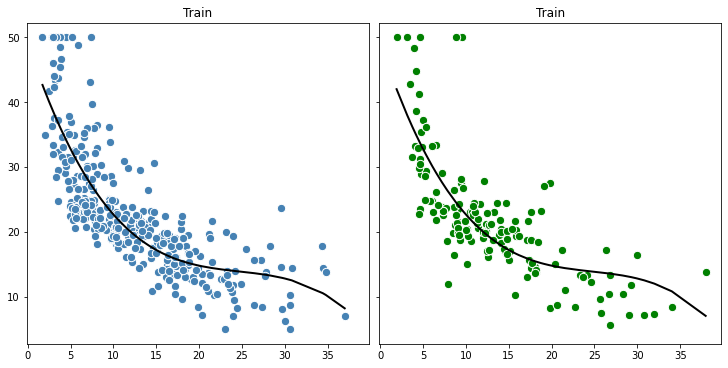

In [52]:
# Plotting

# Indices for sorting during plotting
idx_train = np.argsort(X_train, axis=0).ravel()
idx_test = np.argsort(X_test, axis=0).ravel()

# Plot regression curve
fig, axs = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True, sharex=True, sharey=True)
axs[0].scatter(X_train, y_train, c="steelblue", edgecolor="white", s=70)
axs[0].plot(X_train[idx_train,:1], y_train_pred[idx_train], color="black", lw=2)
axs[0].set_title("Train")

axs[1].scatter(X_test, y_test, c="green", edgecolor="white", s=70)
axs[1].plot(X_test[idx_test,:1], y_test_pred[idx_test], color="black", lw=2)
axs[1].set_title("Train")

Text(0.5, 1.0, 'Test')

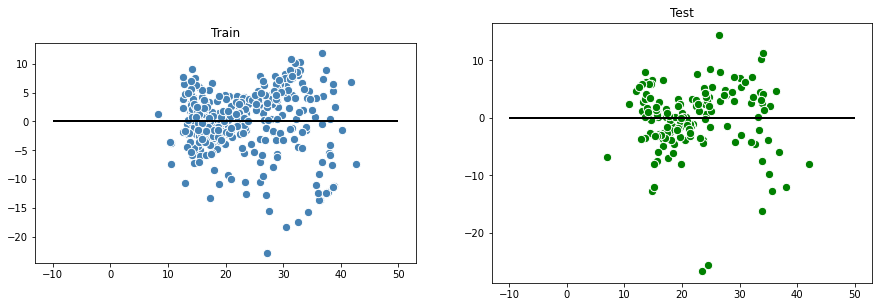

In [53]:
# Plot residual
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,8))
ax1.scatter(y_train_pred, y_train_pred - y_train, c="steelblue", marker="o", edgecolor="white", s=70)
ax1.hlines(y=0, xmin=-10, xmax=50, color="black", lw=2)
ax1.axes.set_aspect("equal")
ax1.set_title('Train')

ax2.scatter(y_test_pred, y_test_pred - y_test, c="green", marker="o", edgecolor="white", s=70)
ax2.hlines(y=0, xmin=-10, xmax=50, color="black", lw=2)
ax2.axes.set_aspect("equal")
ax2.set_title('Test')